In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Dataset Load

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print("Train set shape: ",x_train.shape)
print("Test set shape: ",x_test.shape)

Train set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)


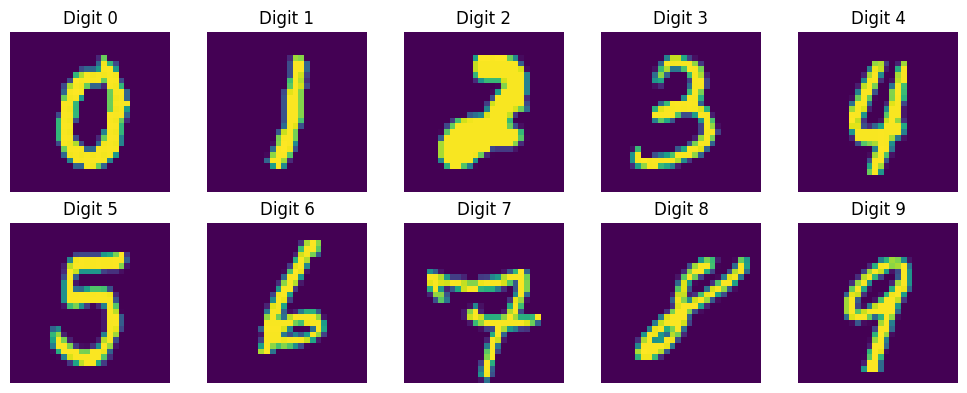

In [39]:
rows = 2
columns = 5

fig, axs = plt.subplots(rows, columns, figsize=(10, 4))

for i in range(10):
    y_ids = y_train == i
    img = random.choice(x_train[y_ids])

    row = i // columns
    col = i % columns

    axs[row, col].imshow(img)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_title(f'Digit {i}')

plt.tight_layout()
plt.show()

In [27]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Digit images seem of nice quality and the classes are balanced

# Preprocessing

In [4]:
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

print("Flat Train set shape:", x_train_flat.shape)
print("Flat Test set shape:", x_test_flat.shape)

Flat Train set shape: (60000, 784)
Flat Test set shape: (10000, 784)


In [46]:
scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)
x_test_flat_scaled = scaler.transform(x_test_flat)

# Multi-Layer Perceptron Classifier

In [ ]:
mlp = MLPClassifier(random_state=0)

mlp.fit(x_train_flat, y_train)

In [45]:
y_pred = mlp.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9645
F1 Score: 0.9644953532388295
Precision: 0.9647081848282716
Recall: 0.9645


**MLP Classifier with normalized values**

In [47]:
mlp = MLPClassifier(random_state=0)

mlp.fit(x_train_flat_scaled, y_train)

y_pred = mlp.predict(x_test_flat_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9743
F1 Score: 0.9743014315186483
Precision: 0.9743177627161999
Recall: 0.9743


Normalized values produce slightly better results (+1 p.p.)

# MLPClassifier Parameters

When configuring a neural network using the MLPClassifier there are several parameters to consider. Here are some of the key parameters:

- **hidden_layer_sizes**: This parameter determines the size and number of hidden layers in the neural network. For example, hidden_layer_sizes=(5, 2) means 2 hidden layers with 5 neurons. default=(100,) which is 1 layer of 100 neurons

- **activation**: Defines the activation function for the hidden layers. Common choices include 'relu' (default), 'tanh', and 'logistic'.

- **solver**: The solver for weight optimization. Common options are 'adam' (default), 'sgd', and 'lbfgs'

- **alpha**: It helps to avoid overfitting by penalizing large weights

- **batch_size**: Size of minibatches for stochastic optimizers. This is the number of samples per gradient update. If set to 'auto', batch_size=min(200, n_samples).

- **learning_rate**: Only used when solver='sgd'. Determines the learning rate schedule. Options include 'constant' (default), 'invscaling', and 'adaptive'

- **learning_rate_init**: The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

- **max_iter**: Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations.

- **random_state**: Determines random number generation for weights and bias initialization, which ensures reproducibility of results.

- **tol**: Tolerance for the optimization. When the loss or score is not improving by at least tol for n_iter_no_change consecutive iterations, unless learning_rate is set to 'adaptive', convergence is considered to be reached and training stops.

- **validation_fraction**: The proportion of training data to set aside as validation set for early stopping.

# KNN Classifier

In [49]:
n_neighbors = int(np.sqrt(x_train_flat.shape[0]))

knn = KNeighborsClassifier(n_neighbors=n_neighbors, random_state=0)

knn.fit(x_train_flat, y_train)

y_pred_knn = knn.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9241
F1 Score: 0.9241202371130496
Precision: 0.92873147144498
Recall: 0.9241


**KNN produces 4p.p. less accuracy accross all metrics (non normalized values)**

# Dimensionality Reduction

Dimensionality reduction technique like Principal Component Analysis (PCA) could be beneficial when applied.
- It can greatly reduce the computational cost, leading to faster processing.
- It can recuce noise
- Help with visualization

In [53]:
pca = PCA(n_components=0.90)  # Keep 90% of variance

x_train_pca = pca.fit_transform(x_train_flat_scaled)
x_test_pca = pca.transform(x_test_flat_scaled)

In [54]:
mlp = MLPClassifier(random_state=0)

mlp.fit(x_train_pca, y_train)

y_pred = mlp.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.973
F1 Score: 0.9730041913268737
Precision: 0.9730337011957272
Recall: 0.973


Keeping 90% of the original variance leads to almost the same scores (-0.1 p.p) and a slight increase of +0.1 p.p. when keeping the 95% of the variance! This may show successful noise reduction but the metric scores are too similar

# Sequantial MLP

In [5]:
num_classes = 10
y_train_one_hot = tf.one_hot(y_train, depth=num_classes)
y_test_one_hot = tf.one_hot(y_test, depth=num_classes)
y_train_one_hot.shape, y_test_one_hot.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [6]:
input_shape = (784,)
num_hidden_layers = 2
units_per_layer = 128
activation = 'relu'

mlp = tf.keras.Sequential(name='my-mlp')
mlp.add(tf.keras.layers.Input(input_shape, name='input_layer'))
for i in range(num_hidden_layers):
  mlp.add(tf.keras.layers.Dense(units=128, activation=activation, name=f'hidden_layer_{i+1}'))
mlp.add(tf.keras.layers.Dense(units=num_classes, activation='softmax', name='output_layer'))
mlp.summary()

Model: "my-mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
learning_rate = 0.001
loss = 'categorical_crossentropy'
metrics = ['accuracy']
batch_size = 32
epochs = 50

start_time = time.perf_counter()

mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
mlp.fit(x_train_flat, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_data=(x_test_flat, y_test_one_hot))

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time} seconds")

Epoch 1/50
1875/1875 [==============================] - 14s 5ms/step - loss: 1.7465 - accuracy: 0.8732 - val_loss: 0.4532 - val_accuracy: 0.9108
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3340 - accuracy: 0.9277 - val_loss: 0.2430 - val_accuracy: 0.9439
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2101 - accuracy: 0.9467 - val_loss: 0.1984 - val_accuracy: 0.9493
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1612 - accuracy: 0.9557 - val_loss: 0.1877 - val_accuracy: 0.9492
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1505 - accuracy: 0.9588 - val_loss: 0.1865 - val_accuracy: 0.9503
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1334 - accuracy: 0.9624 - val_loss: 0.1957 - val_accuracy: 0.9490
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1216 - accuracy: 0.9652 - val_loss: 0.1510 - val_accuracy

--- Log

Execution time (CPU): 503.2487058309998 seconds

Execution time (GPU): 383.248261316 seconds


# CNN

In [22]:
num_classes = 10
num_conv_layers = 2
num_filters = 64
kernel_size = (5,5)
strides = (1,1)
mlp_num_hidden_layers = 2
mlp_units_per_layer = 128
activation = 'relu'
drouput_rate = 0.4

x_train_cnn = np.reshape(x_train, (x_train.shape[0],28,28,1))
x_test_cnn = np.reshape(x_test, (x_test.shape[0],28,28,1))

cnn = tf.keras.Sequential(name='my-cnn')
cnn.add(tf.keras.layers.Input((28,28,1),name='input_layer'))

for i in range(num_conv_layers):
  cnn.add(
      tf.keras.layers.Conv2D(
          filters=num_filters,
          kernel_size=kernel_size,
          strides=strides,
          activation=activation,
          name=f'conv_layer_{i+1}'
      )
  )
  cnn.add(tf.keras.layers.Dropout(rate=0.4, name=f'drouput_{i+1}'))
  cnn.add(tf.keras.layers.MaxPooling2D(name=f'maxpool_{i+1}'))

cnn.add(tf.keras.layers.Flatten())

for i in range(mlp_num_hidden_layers):
  cnn.add(tf.keras.layers.Dense(units=mlp_units_per_layer, activation=activation,name=f'hidden_layer_{i+1}'))
cnn.add(tf.keras.layers.Dense(units=num_classes, activation='softmax',name='output_layer'))

cnn.summary()

Model: "my-cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 24, 24, 64)        1664      
                                                                 
 drouput_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 8, 8, 64)          102464    
                                                                 
 drouput_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 4, 4, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0    

In [23]:
learning_rate = 0.001
loss = 'categorical_crossentropy'
metrics = ['accuracy']
batch_size = 32
epochs = 50

start_time = time.perf_counter()

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=metrics)
cnn.fit(x_train_cnn, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_data=(x_test_cnn, y_test_one_hot))

end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Execution time: {elapsed_time} seconds")

Epoch 1/50
1875/1875 [==============================] - 19s 6ms/step - loss: 0.3892 - accuracy: 0.9332 - val_loss: 0.0754 - val_accuracy: 0.9791
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1009 - accuracy: 0.9704 - val_loss: 0.0685 - val_accuracy: 0.9845
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0877 - accuracy: 0.9757 - val_loss: 0.0703 - val_accuracy: 0.9847
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0782 - accuracy: 0.9780 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0688 - accuracy: 0.9805 - val_loss: 0.0509 - val_accuracy: 0.9883
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0625 - accuracy: 0.9826 - val_loss: 0.0533 - val_accuracy: 0.9860
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0576 - accuracy: 0.9844 - val_loss: 0.0537 - val_accu